### Time Series Forecasting using Multiple Regressors and correlated Dataframes to achieve most optimal Results

In [660]:
from fbprophet import Prophet 
from fbprophet.plot import plot,add_changepoints_to_plot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from finta import TA
import matplotlib.pyplot as plt
%matplotlib inline

In [552]:
df1 = pd.read_csv('TSLA1Year.csv') #tsla 1 year 1h data
df2 = pd.read_csv('QQQ1Year.csv')# qqq 1 year 1h data
df3 = pd.read_csv('SPY1Year.csv') # spy 1 year 1h data

In [676]:

fig = go.Figure(data=go.Ohlc(x=df['Datetime'],
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Adj Close']))
fig.update_layout(
    title='TSLA Stock Price')
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()


Adding Technical Indicators and combining the dataframes

In [553]:
df1['Returns'] = df1.Close.pct_change()
df2['QQQ Returns'] = df2.Close.pct_change()
df3['SPY Returns'] = df3.Close.pct_change()

df1['Log Returns'] = np.log(1+df1['Returns'])
df2['QQQLog Returns'] = np.log(1+df2['QQQ Returns'])
df3['SPY Log Returns'] = np.log(1+df3['SPY Returns'])

df1.fillna(0,inplace=True)
df2.fillna(0,inplace=True)
df3.fillna(0,inplace=True)

In [554]:
df1['RSI'] = TA.RSI(df1) #somehow important
df1['MACD'] = TA.VWAP(df1)
df1['SMA'] = TA.SMA(df1)
df1['BBANDS'] = TA.ROC(df1)
df1['EMA'] = TA.EMA(df1)

df1.fillna(0, inplace=True)


df2['QQQ RSI'] = TA.RSI(df2) #somehow important
df2['QQQ MACD'] = TA.VWAP(df2)
df2['QQQ SMA'] = TA.SMA(df2)
df2['QQQ BBANDS'] = TA.ROC(df2)
df2['QQQ EMA'] = TA.EMA(df2)

df2.fillna(0, inplace=True)

df2 = df2.drop(columns=['Open','High','Low','Close','Adj Close','Volume']) 

df3['SPY RSI'] = TA.RSI(df3) #somehow important
df3['SPY MACD'] = TA.VWAP(df3)
df3['SPY SMA'] = TA.SMA(df3)
df3['SPY BBANDS'] = TA.ROC(df3)
df3['SPYEMA'] = TA.EMA(df3)

df3.fillna(0, inplace=True)

df3 = df3.drop(columns=['Open','High','Low','Close','Adj Close','Volume']) 



df = pd.merge(pd.merge(df1,df2,on='Datetime'),df3,on='Datetime')
df = df.drop(columns=['Close'])

df.shape

(1757, 27)

In [555]:
df.tail()

,Datetime,Open,High,Low,Adj Close,Volume,Returns,Log Returns,RSI,MACD,...,QQQ SMA,QQQ BBANDS,QQQ EMA,SPY Returns,SPY Log Returns,SPY RSI,SPY MACD,SPY SMA,SPY BBANDS,SPYEMA
1752,2021-07-09 11:30:00,652.150024,656.690002,650.361389,655.684998,2008134,0.005536,0.005521,51.590624,569.121523,...,357.845272,-0.027723,359.501736,-0.000184,-0.000184,61.594566,374.593703,431.705930,0.089813,432.821032
1753,2021-07-09 12:30:00,655.619995,658.909973,653.559998,654.609985,2375168,-0.001640,-0.001641,50.208194,569.144752,...,358.006980,0.031907,359.778391,0.000506,0.000506,62.336734,374.612875,431.876051,0.082850,433.228822
1754,2021-07-09 13:30:00,654.580017,655.399902,652.849976,654.670105,1397758,0.000092,0.000092,50.288420,569.158198,...,358.158194,0.019351,360.002675,0.000690,0.000690,63.376269,374.627569,432.046783,0.165731,433.615059
1755,2021-07-09 14:30:00,654.900024,656.250000,653.500000,655.153687,1661450,0.000739,0.000738,50.972703,569.174298,...,358.320463,1.163538,360.218741,0.000873,0.000873,64.705070,374.654696,432.229222,1.533947,434.000049
1756,2021-07-09 15:30:00,655.070007,657.619995,655.070007,656.989990,1678686,0.002803,0.002799,53.585419,569.190861,...,358.486316,1.134609,360.374993,-0.000138,-0.000138,64.308341,374.719890,432.378247,1.300332,434.296041


In [556]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

Text(0.5, 1.0, 'TSLA-SPY-QQQ Returns')

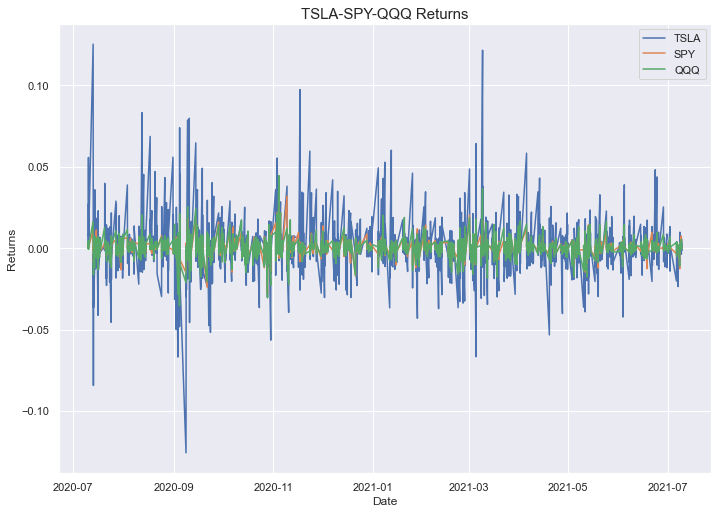

In [657]:
sns.lineplot(df['Datetime'],df['Returns'],label='TSLA')
sns.lineplot(df['Datetime'],df['SPY Returns'],label='SPY')
sns.lineplot(df['Datetime'],df['QQQ Returns'],label='QQQ')


plt.xlabel("Date")
plt.ylabel('Returns')
plt.title('TSLA-SPY-QQQ Returns',fontsize=15)


Text(0.5, 1.0, 'TSLA-SPY-QQQ Boilinger Bands')

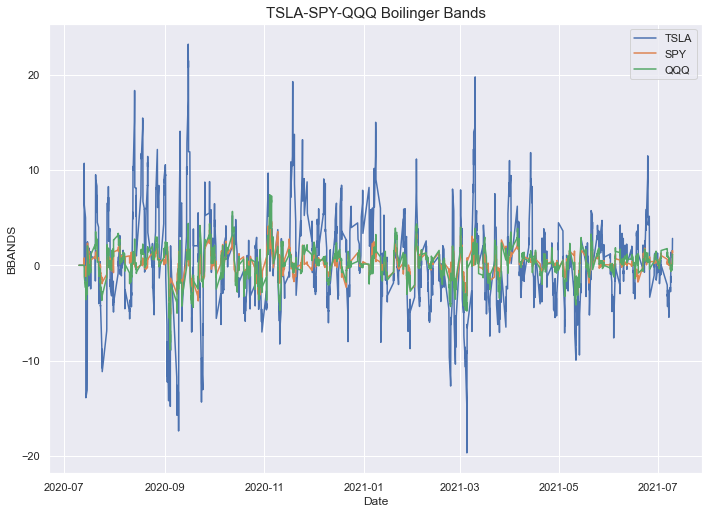

In [654]:
sns.lineplot(df['Datetime'],df['BBANDS'],label='TSLA')
sns.lineplot(df['Datetime'],df['SPY BBANDS'],label='SPY')
sns.lineplot(df['Datetime'],df['QQQ BBANDS'],label='QQQ')


plt.xlabel("Date")
plt.ylabel('BBANDS')
plt.title('TSLA-SPY-QQQ Boilinger Bands',fontsize=15)


Text(0.5, 1.0, 'TSLA-SPY-QQQ Relative Strength Index')

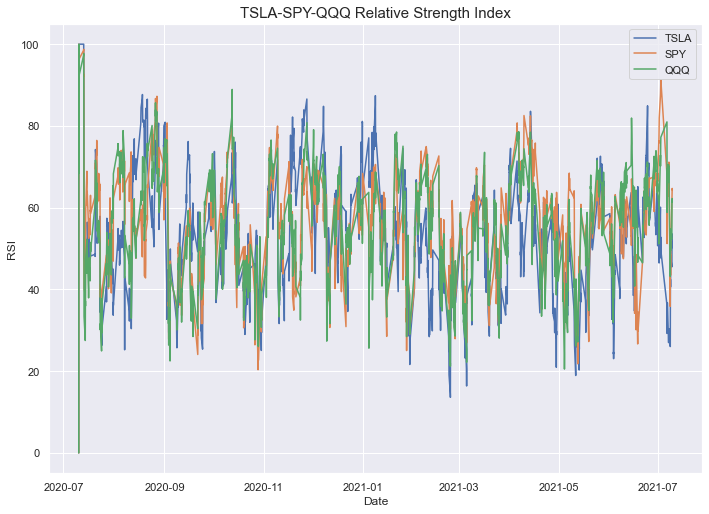

In [655]:
sns.lineplot(df['Datetime'],df['RSI'],label='TSLA')
sns.lineplot(df['Datetime'],df['SPY RSI'],label='SPY')
sns.lineplot(df['Datetime'],df['QQQ RSI'],label='QQQ')

plt.xlabel("Date")
plt.ylabel('RSI')
plt.title('TSLA-SPY-QQQ Relative Strength Index',fontsize=15)

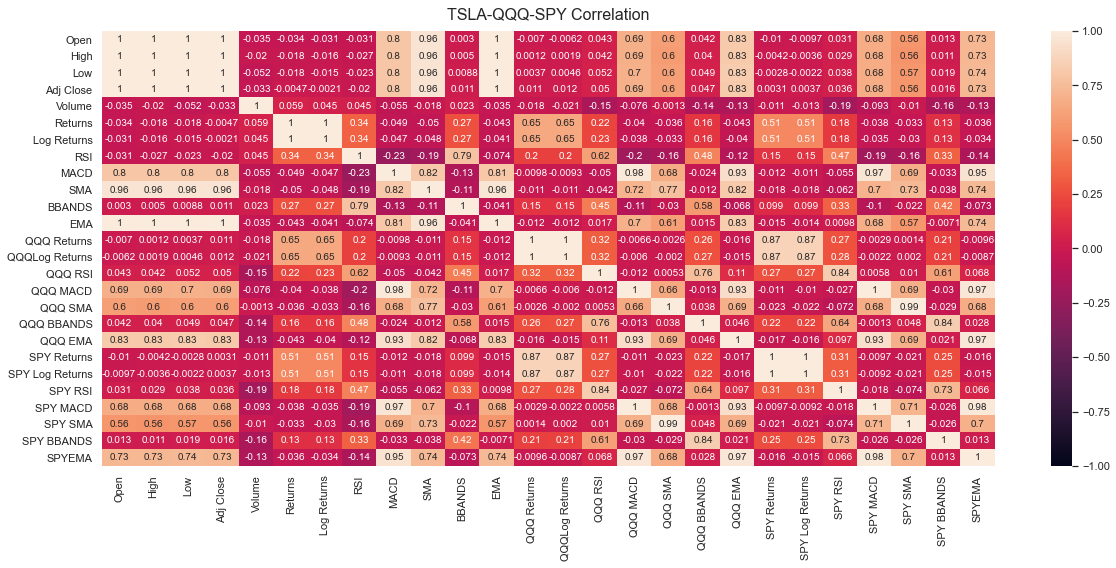

In [560]:
df.corr()
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('TSLA-QQQ-SPY Correlation', fontdict={'fontsize':16}, pad=12);

Creating Dataframe for FBProphet

In [561]:
X = df[['Datetime','High','Low','Adj Close','Volume','Returns','Log Returns','RSI','MACD','SMA','BBANDS','EMA','QQQ Returns',
      'QQQLog Returns','QQQ RSI','QQQ MACD','QQQ SMA','QQQ BBANDS','QQQ EMA', 'SPY Returns','SPY Log Returns',
       'SPY RSI','SPY MACD','SPY SMA','SPY BBANDS','SPYEMA']]

y  = df[['Open']]

train_dataset = pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(X['Datetime'])
train_dataset['y'] = y
train_dataset.head()


,ds,y
0,2020-07-10 09:30:00,279.200012
1,2020-07-10 10:30:00,280.727997
2,2020-07-10 11:30:00,281.304260
3,2020-07-10 12:30:00,282.406006
4,2020-07-10 13:30:00,298.101990


In [562]:
#Adding all components

train_dataset['High'] = X['High']
train_dataset['Low'] = X['Low']
train_dataset['Adj Close'] = X['Adj Close']
train_dataset['Volume'] = X['Volume']
train_dataset['Returns'] = X['Returns']
train_dataset['Log Returns'] = X['Log Returns']
train_dataset['BBANDS'] = X['BBANDS']
train_dataset['RSI'] = X['RSI']
train_dataset['MACD'] = X['MACD']
train_dataset['SMA'] = X['SMA']
train_dataset['EMA'] = X['EMA']

train_dataset['QQQ Returns'] = X['QQQ Returns']
train_dataset['QQQLog Returns'] = X['QQQLog Returns']
train_dataset['QQQ RSI'] = X['QQQ RSI']
train_dataset['QQQ MACD'] = X['QQQ MACD']
train_dataset['QQQ SMA'] = X['QQQ SMA']
train_dataset['QQQ EMA'] = X['QQQ EMA']
train_dataset['QQQ BBANDS'] = X['QQQ BBANDS']

train_dataset['SPY Returns'] = X['SPY Returns']
train_dataset['SPY Log Returns'] = X['SPY Log Returns']
train_dataset['SPY SMA'] = X['SPY SMA']
train_dataset['SPYEMA'] = X['SPYEMA']
train_dataset['SPY RSI'] = X['SPY RSI']
train_dataset['SPY BBANDS'] = X['SPY BBANDS']
train_dataset['SPY MACD'] = X['SPY MACD']

X_train = train_dataset[:1400]
X_test = train_dataset[1400:]

Creating the first Model and testing on the excluded data

In [572]:
model= Prophet(daily_seasonality=True)



model.add_regressor('High')
model.add_regressor('Low')
model.add_regressor('Adj Close')
model.add_regressor('Volume')   
model.add_regressor('Returns')
model.add_regressor('Log Returns') 
model.add_regressor('BBANDS')
model.add_regressor('RSI')
model.add_regressor('MACD')
model.add_regressor('SMA')
model.add_regressor('EMA')  


model.add_regressor('QQQ Returns')
model.add_regressor('QQQLog Returns') 
model.add_regressor('QQQ RSI')
model.add_regressor('QQQ MACD')
model.add_regressor('QQQ SMA')
model.add_regressor('QQQ EMA')
model.add_regressor('QQQ BBANDS')


model.add_regressor('SPY Returns')
model.add_regressor('SPY Log Returns')
model.add_regressor('SPY RSI')
model.add_regressor('SPY SMA')
model.add_regressor('SPYEMA')
model.add_regressor('SPY BBANDS')
model.add_regressor('SPY MACD')






In [573]:
model.fit(X_train)
forecast_data = model.make_future_dataframe(periods=150, freq='H')

forecast_data= model.predict(X_test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [574]:
model.component_modes

{'additive': ['weekly',
  'daily',
  'Volume',
  'Returns',
  'Log Returns',
  'BBANDS',
  'RSI',
  'MACD',
  'SMA',
  'EMA',
  'QQQ Returns',
  'QQQLog Returns',
  'QQQ RSI',
  'QQQ MACD',
  'QQQ SMA',
  'QQQ EMA',
  'QQQ BBANDS',
  'SPY Returns',
  'SPY Log Returns',
  'SPY RSI',
  'SPY SMA',
  'SPYEMA',
  'SPY BBANDS',
  'SPY MACD',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [575]:
model.params

{'k': array([[0.09053018]]),
 'm': array([[0.55254398]]),
 'delta': array([[-3.64858964e-06, -1.05440074e-01, -7.02655317e-02,
          8.26367247e-05,  2.61318683e-04,  7.12971324e-06,
          4.11753597e-03,  3.43419712e-05,  1.05496458e-01,
          2.50953124e-02, -6.44272327e-02, -6.16982961e-03,
          4.00427935e-07, -1.56545268e-03, -1.78991901e-03,
         -1.20936932e-02, -3.31051379e-03, -2.94405234e-07,
         -1.07453125e-02, -2.20399053e-02, -1.62292907e-03,
         -1.00361833e-02,  1.12802327e-06, -5.78970496e-07,
          6.43040202e-02]]),
 'sigma_obs': array([[0.00727248]]),
 'beta': array([[ 3.02694041e-03, -1.16588468e-02, -3.58722703e-03,
          7.09534625e-03,  1.27611112e-03, -3.68144550e-03,
         -6.30290263e-03, -1.34245853e-01, -1.13713370e-02,
         -2.88188376e-02, -6.27334121e-03,  2.03243312e-02,
         -5.48372551e-04,  1.07591183e-02, -1.57476727e-03,
         -2.58081499e-03,  9.41877363e-04,  5.24391022e-03,
          7.1755011

##### First Results 

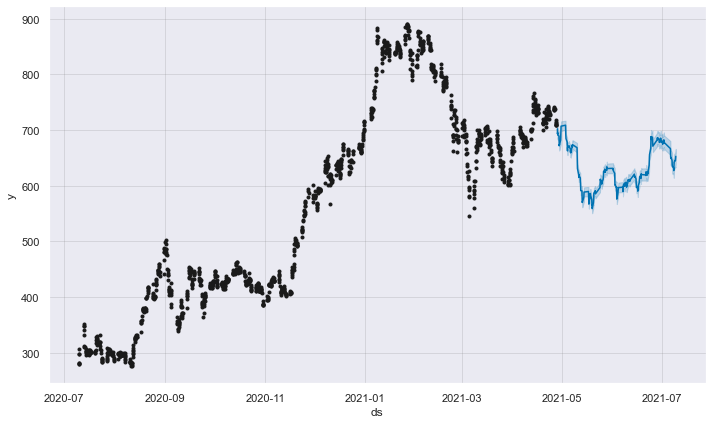

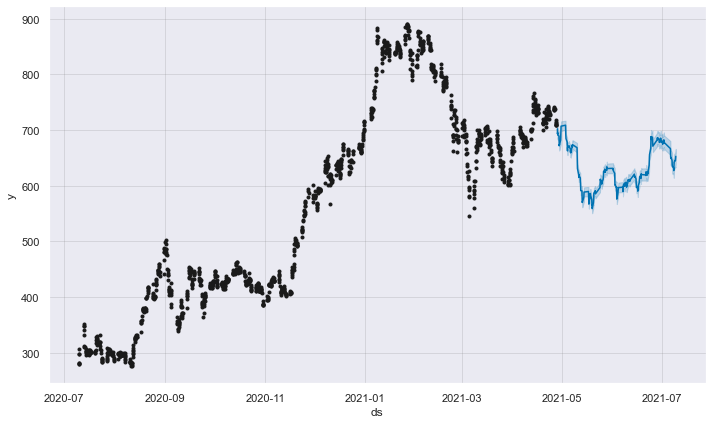

In [576]:
model.plot(forecast_data)

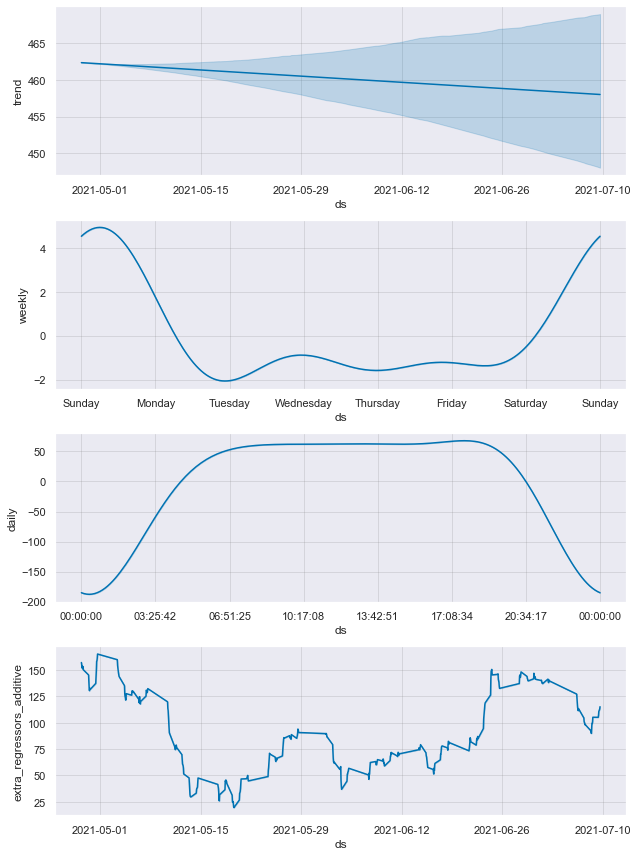

In [577]:
fig = pro_regressor.plot_components(forecast_data)

Text(0.5, 1.0, 'Prediction of the X_test dataframe')

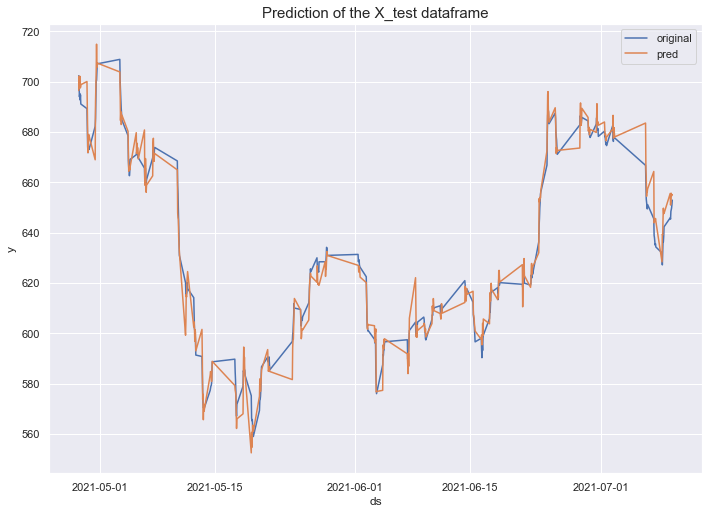

In [579]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(forecast_data['ds'],forecast_data['yhat'],label='original')
sns.lineplot(X_test['ds'],X_test['y'],label='pred')


plt.title('Prediction of the X_test dataframe',fontsize=15)

[[<matplotlib.lines.Line2D at 0x7fda88f3c550>],

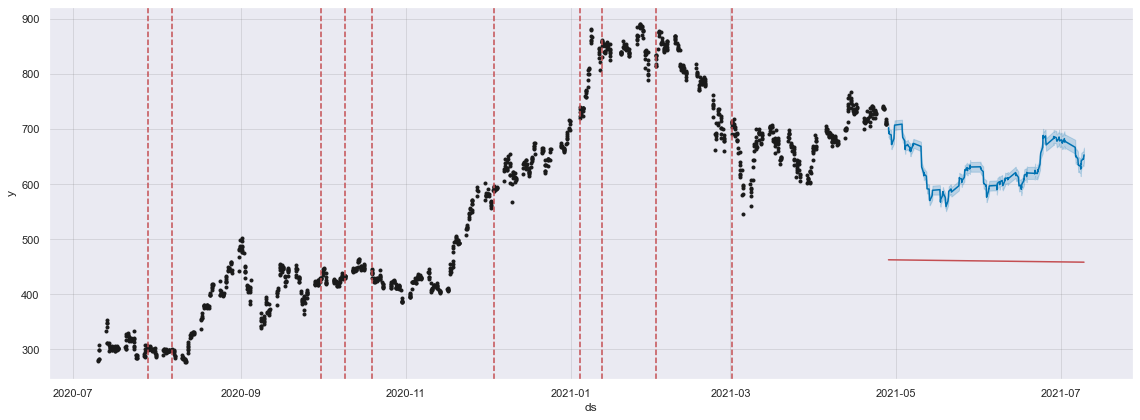

In [580]:
#Changepoints

fig = plot(model, forecast_data,figsize=(16,6))
ax = fig.gca()
add_changepoints_to_plot(ax, model, forecast_data)

Cross Validation 

In [581]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='1400 hours', period='250 hours', horizon = '200 hours')
df_cv.tail()


INFO:fbprophet:Making 22 forecasts with cutoffs between 2020-09-12 13:30:00 and 2021-04-19 07:30:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
865,2021-04-27 11:30:00,715.260306,707.235072,723.872726,713.903198,2021-04-19 07:30:00
866,2021-04-27 12:30:00,712.502203,704.323501,720.638907,713.229919,2021-04-19 07:30:00
867,2021-04-27 13:30:00,709.520183,701.480528,717.902280,710.669983,2021-04-19 07:30:00
868,2021-04-27 14:30:00,707.165505,698.929752,715.094424,709.449890,2021-04-19 07:30:00
869,2021-04-27 15:30:00,703.358859,695.069981,711.743822,708.300110,2021-04-19 07:30:00


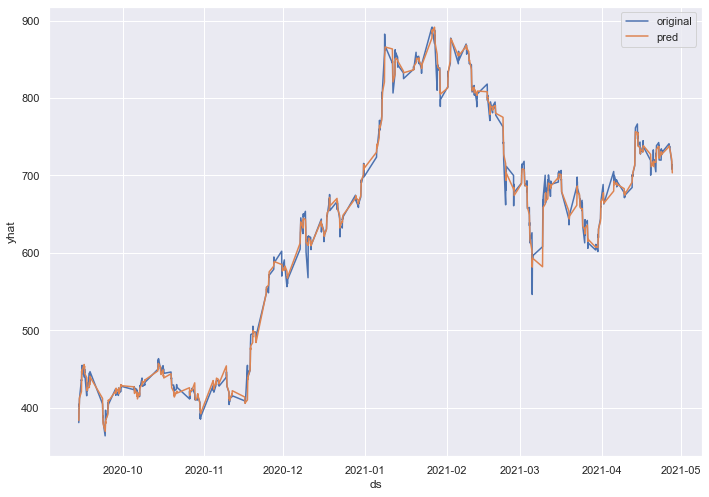

In [649]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(df_cv['ds'],df_cv['y'],label='original')
sns.lineplot(df_cv['ds'],df_cv['yhat'],label='pred')


Performance Metrics

In [583]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
178,8 days 04:00:00,74.639765,8.639431,5.425874,0.008758,0.006290,0.718391
179,8 days 05:00:00,72.451673,8.511855,5.308508,0.008609,0.006290,0.726437
180,8 days 06:00:00,69.633048,8.344642,5.125388,0.008355,0.005839,0.733333
181,8 days 07:00:00,68.520416,8.277706,5.074958,0.008284,0.005636,0.731801
182,8 days 08:00:00,67.429149,8.211525,5.024890,0.008190,0.005839,0.744828


horizon     4 days 13:18:11.803278688
mse                         62.589783
rmse                         7.768998
mae                          5.302238
mape                         0.008889
mdape                        0.006254
coverage                     0.767665
dtype: object

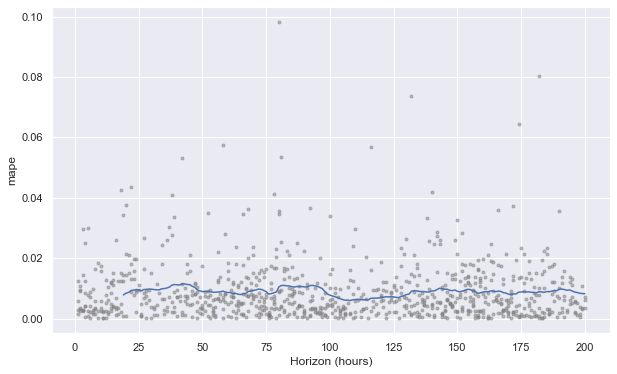

In [584]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
df_p.mean()

##### Hypeparameter Tuning

In [609]:
def getPerformance(model):
    return performance_metrics(getCrossValidationData(model))

def getCrossValidation(model):
    return cross_validation(model, initial='1400 hours', period='250 hours', horizon = '200 hours')

In [610]:

import itertools

def create_param_combinations(**param_dict):
    param_iter = itertools.product(*param_dict.values())
    params = []
    
    for param in param_iter:
        params.append(param)
        
    params_df = pd.DataFrame(params, columns = list(param_dict.keys()))
    return params_df


def single_model_cv(X_train, metrics, param_dict, parallel):
    model = Prophet(**param_dict)
    model.add_regressor('High')
    model.add_regressor('Low')
    model.add_regressor('Adj Close')
    model.add_regressor('Volume')   
    model.add_regressor('Returns')
    model.add_regressor('Log Returns') 
    model.add_regressor('BBANDS')
    model.add_regressor('RSI')
    model.add_regressor('MACD')
    model.add_regressor('SMA')
    model.add_regressor('EMA')  


    model.add_regressor('QQQ Returns')
    model.add_regressor('QQQLog Returns') 
    model.add_regressor('QQQ RSI')
    model.add_regressor('QQQ MACD')
    model.add_regressor('QQQ SMA')
    model.add_regressor('QQQ EMA')
    model.add_regressor('QQQ BBANDS')


    model.add_regressor('SPY Returns')
    model.add_regressor('SPY Log Returns')
    model.add_regressor('SPY RSI')
    model.add_regressor('SPY SMA')
    model.add_regressor('SPYEMA')
    model.add_regressor('SPY BBANDS')
    model.add_regressor('SPY MACD')





    model.fit(train_dataset)
    df_cv = getCrossValidation(model)
    df_p = performance_metrics(df_cv, rolling_window=1)
    df_p['params'] = str(param_dict)
    df_p = df_p.loc[:, metrics]
    return df_p


pd.set_option('display.max_colwidth',None)
param_grid = {
    
    'changepoint_prior_scale': [0.1,0.2,0.5,0.7,0.9],
    'changepoint_range': [0.1,0.3,0.5,0.7,0.9],
    'holidays_prior_scale': [1.0],
    'seasonality_prior_scale': [0.5],
    'daily_seasonality': [1,2,5]
}

metrics = ['horizon', 'rmse', 'mae', 'mape', 'mdape', 'params']
results = []


params_df = create_param_combinations(**param_grid)
for param in params_df.values:
    param_dict = dict(zip(params_df.keys(), param))
    cv_df = single_model_cv(df, metrics, param_dict, parallel='processes')
    results.append(cv_df)
    
    
results_df = pd.concat(results).reset_index(drop=True)
best_param = results_df.loc[results_df['rmse'] == min(results_df['rmse']), ['params']]


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-09-12 15:30:00 and 2021-07-01 07:30:00




 The best param combination is {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_prior_scale': 0.5, 'daily_seasonality': 1.0}


horizon    8 days 08:00:00
rmse              3.180142
mae               2.192122
mape              0.003618
mdape             0.002523
dtype: object

In [611]:
print(f'\n The best parameter combination is {best_param.values[0][0]}')
results_df.mean()


 The best parameter combination is {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_prior_scale': 0.5, 'daily_seasonality': 1.0}


horizon    8 days 08:00:00
rmse              3.180142
mae               2.192122
mape              0.003618
mdape             0.002523
dtype: object

# PREDICT THE FUTURE

In [585]:
train_data = pd.DataFrame()
train_data['ds'] = pd.to_datetime(X['Datetime'])
train_data['y'] = y

#Additional REGRESSOR

#Additional REGRESSOR

train_data['High'] = X['High']
train_data['Low'] = X['Low']
train_data['Adj Close'] = X['Adj Close']
train_data['Volume'] = X['Volume']
train_data['Returns'] = X['Returns']
train_data['Log Returns'] = X['Log Returns']
train_data['BBANDS'] = X['BBANDS']
train_data['RSI'] = X['RSI']
train_data['MACD'] = X['MACD']
train_data['SMA'] = X['SMA']
train_data['EMA'] = X['EMA']

train_data['QQQ Returns'] = X['QQQ Returns']
train_data['QQQLog Returns'] = X['QQQLog Returns']
train_data['QQQ RSI'] = X['QQQ RSI']
train_data['QQQ MACD'] = X['QQQ MACD']
train_data['QQQ SMA'] = X['QQQ SMA']
train_data['QQQ EMA'] = X['QQQ EMA']
train_data['QQQ BBANDS'] = X['QQQ BBANDS']

train_data['SPY Returns'] = X['SPY Returns']
train_data['SPY Log Returns'] = X['SPY Log Returns']
train_data['SPY SMA'] = X['SPY SMA']
train_data['SPYEMA'] = X['SPYEMA']
train_data['SPY RSI'] = X['SPY RSI']
train_data['SPY BBANDS'] = X['SPY BBANDS']
train_data['SPY MACD'] = X['SPY MACD']

   



train_data.tail()

data_train = train_data[train_data['ds'].dt.dayofweek < 5]

The number of periods is the number of hours we want to predict (in this example we predict 24 hours )

In [640]:
future = pro_regressor.make_future_dataframe(periods=24,freq='H')


#Additional REGRESSOR

future['High'] = train_data['High']
future['Low'] = train_data['Low']
future['Adj Close'] = train_data['Adj Close']
future['Volume'] = train_data['Volume']
future['Returns'] = train_data['Returns']
future['Log Returns'] = train_data['Log Returns']
future['BBANDS'] = train_data['BBANDS']
future['RSI'] = train_data['RSI']
future['MACD'] = train_data['MACD']
future['SMA'] = train_data['SMA']
future['EMA'] = train_data['EMA']

future['QQQ Returns'] = train_data['QQQ Returns']
future['QQQLog Returns'] = train_data['QQQLog Returns']
future['QQQ RSI'] = train_data['QQQ RSI']
future['QQQ MACD'] = train_data['QQQ MACD']
future['QQQ SMA'] = train_data['QQQ SMA']
future['QQQ EMA'] = train_data['QQQ EMA']
future['QQQ BBANDS'] = train_data['QQQ BBANDS']

future['SPY Returns'] = train_data['SPY Returns']
future['SPY Log Returns'] = train_data['SPY Log Returns']
future['SPY SMA'] = train_data['SPY SMA']
future['SPYEMA'] = train_data['SPYEMA']
future['SPY RSI'] = train_data['SPY RSI']
future['SPY BBANDS'] = train_data['SPY BBANDS']
future['SPY MACD'] = train_data['SPY MACD']

   
future = future.fillna(method='ffill')


Using the tuned Hyperparameters for best results

In [641]:
pro_regressor = Prophet(changepoint_prior_scale= 0.1, 
                        changepoint_range= 0.1,
                        holidays_prior_scale=1.0, 
                        seasonality_prior_scale= 0.5, 
                        daily_seasonality= 1.0)

pro_regressor.add_regressor('High')
pro_regressor.add_regressor('Low')
pro_regressor.add_regressor('Adj Close')
pro_regressor.add_regressor('Volume')  


#feeding in high, low, adj close, vol  data which is hourly makes model kinda too good to be true

pro_regressor.add_regressor('Returns')
pro_regressor.add_regressor('Log Returns') 
#looking at the returns only model just follows a trend (in this case upwards)

pro_regressor.add_regressor('BBANDS')
pro_regressor.add_regressor('RSI')
#taking in RSI and BBAnds the results is a bit too positive but the movement is right

pro_regressor.add_regressor('MACD')
pro_regressor.add_regressor('SMA')
pro_regressor.add_regressor('EMA')  
#getting in the MACD, SMA and EMA the Model gets very very good




pro_regressor.add_regressor('QQQ Returns')
pro_regressor.add_regressor('QQQLog Returns') 
pro_regressor.add_regressor('QQQ RSI')
pro_regressor.add_regressor('QQQ MACD')
pro_regressor.add_regressor('QQQ SMA')
pro_regressor.add_regressor('QQQ EMA')
pro_regressor.add_regressor('QQQ BBANDS')

#qqq gets not really close 
#trend with qq returns right, movement not close


pro_regressor.add_regressor('SPY Returns')
pro_regressor.add_regressor('SPY Log Returns')
pro_regressor.add_regressor('SPY RSI')
pro_regressor.add_regressor('SPY SMA')
pro_regressor.add_regressor('SPYEMA')
pro_regressor.add_regressor('SPY BBANDS')
pro_regressor.add_regressor('SPY MACD')


pro_regressor.fit(data_train)




INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [642]:
forecast = pro_regressor.predict(future)

In [647]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Adj Close,Adj Close_lower,Adj Close_upper,BBANDS,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1776,2021-07-10 11:30:00,576.075417,655.175562,662.521937,576.075417,576.075417,-27.375941,-27.375941,-27.375941,0.074461,...,80.275709,80.275709,80.275709,1.799346,1.799346,1.799346,0.0,0.0,0.0,658.961272
1777,2021-07-10 12:30:00,576.075665,655.570318,662.841067,576.075665,576.075665,-27.375941,-27.375941,-27.375941,0.074461,...,80.275709,80.275709,80.275709,2.045278,2.045278,2.045278,0.0,0.0,0.0,659.303559
1778,2021-07-10 13:30:00,576.075912,655.915705,663.223240,576.075912,576.075912,-27.375941,-27.375941,-27.375941,0.074461,...,80.275709,80.275709,80.275709,2.291310,2.291310,2.291310,0.0,0.0,0.0,659.584141
1779,2021-07-10 14:30:00,576.076159,656.116499,663.480743,576.076159,576.076159,-27.375941,-27.375941,-27.375941,0.074461,...,80.275709,80.275709,80.275709,2.535697,2.535697,2.535697,0.0,0.0,0.0,659.798937
1780,2021-07-10 15:30:00,576.076407,656.159080,663.651326,576.076407,576.076407,-27.375941,-27.375941,-27.375941,0.074461,...,80.275709,80.275709,80.275709,2.776656,2.776656,2.776656,0.0,0.0,0.0,659.948196


This are the predicted Stock Prices for the next 24 hours

In [644]:
forecast['yhat'].tail(24)

1757    655.767713
1758    655.626535
1759    655.464394
1760    655.297299
1761    655.142315
1762    655.016431
1763    654.935413
1764    654.912740
1765    654.958686
1766    655.079613
1767    655.277520
1768    655.549883
1769    655.889796
1770    656.286398
1771    656.725564
1772    657.190810
1773    657.664353
1774    658.128245
1775    658.565523
1776    658.961272
1777    659.303559
1778    659.584141
1779    659.798937
1780    659.948196
Name: yhat, dtype: float64

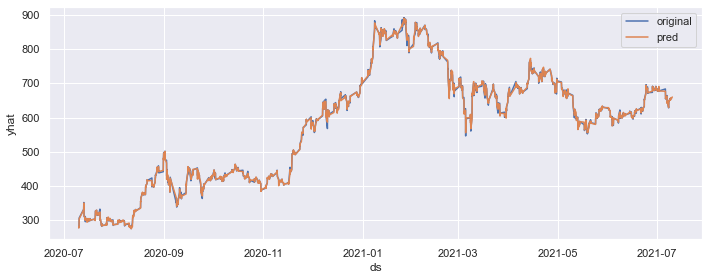

In [645]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,4.27)})

sns.lineplot(train_dataset['ds'],train_dataset['y'],label='original')
sns.lineplot(forecast['ds'],forecast['yhat'],label='pred')
